In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams.update({'font.size':20})

In [2]:
from scipy.stats import gaussian_kde

def comparison_plots(data, hlines=None, vlines=None, quads=None):
    #1 = len(vars)
    #jcount = len(vars[0])

    #fig = plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    fig.set_facecolor('white')
    
    dx = gaussian_kde(data)
    lx = np.linspace(min(data),max(data),1000)
    dlx = dx(lx)
    ax.fill_between(lx,dlx,color='lightgrey')
    ax.vlines(np.quantile(data,[0.0,0.25,0.5,0.75,1.0]),0,np.array([0.25,0.5,1.0,0.5,0.25])*max(dlx)/2,linewidth=5,color='red')
    ax.get_yaxis().set_visible(False)

    return fig

def hist_kde_pair(data, stretch_factor=6, var_name=None):

    fig, ax = plt.subplot_mosaic([['KDE'], ['hist']], figsize=(20, 10), 
                                 gridspec_kw={'height_ratios':[1, stretch_factor]})
    
    dx = gaussian_kde(data)
    lx = np.linspace(min(data),max(data),1000)
    dlx = dx(lx)
    ax['KDE'].fill_between(lx,dlx,color='lightgrey')
    ax['KDE'].vlines(np.quantile(data,[0.0,0.25,0.5,0.75,1.0]),0,np.array([0.25,0.5,1.0,0.5,0.25])*max(dlx)/2,linewidth=5,color='red')
    ax['KDE'].get_yaxis().set_visible(False)
    ax['KDE'].get_xaxis().set_visible(False)
    
    
    ax['hist'].hist(data, bins=[i*0.00625 for i in range(32)], edgecolor='k')
    #ax.set_title('RMS Difference')
    ax['hist'].set_xlabel(var_name)
    ax['hist'].set_ylabel('Counts')
    ax['hist'].grid(axis='y')
    
    plt.tight_layout()    
    return fig


In [3]:
models_dir = 'corrected_models' # cell_collective OR corrected_models

QC = pd.read_csv('data/model_categories.csv')
QC.columns = ['name', 'category', 'PMID']

names = []
dss_list = []

with open(f'data/{models_dir}/converged_average_node_values.csv', 'r') as f:
    for row in f:
        entries = row.split(',')
        name = entries.pop(0)
        convergence_measure = entries.pop(0)
        alt_measure = entries.pop(0)
        scheme = entries.pop(0)
        
        if scheme == 'synchronous':
            names.append(name)
            sync_average_values = [float(value) for value in entries]
            dss = 0
        elif scheme == 'asynchronous':
            async_average_values = [float(value) for value in entries]
            for i, value in enumerate(sync_average_values):
                dss += (sync_average_values[i] - async_average_values[i])**2
            dss_list.append(dss)

print(names)
print(dss_list)

N = []
NS = []
for name in names:
    with open(f'models/{models_dir}/{name}.txt', 'r') as f:
        nt = 0
        ns = 0
        for row in f:
            if row[0] == '#':
                continue
            nt += 1
            if row.split(',')[0].strip() == row.split(',')[1].strip():
                ns += 1
        N.append(nt)
        NS.append(ns)

NDF = pd.DataFrame({
    'name': names,
    'N': N,
    'NS': NS,
    'dss': dss_list,
})

QC=QC.merge(NDF)
QC['dss/N'] = (QC['dss'])/(QC['N'])
QC['NS/N'] = (QC['NS'])/(QC['N'])
QC['RMSD'] = np.sqrt(QC['dss/N'])

QC.set_index('name', inplace=True)
QC.sort_values(by=['dss/N'], ascending=False)

['Apoptosis Network', 'Arabidopsis thaliana Cell Cycle', 'Aurora Kinase A in Neuroblastoma', 'B bronchiseptica and T retortaeformis coinfection', 'B cell differentiation', 'BT474 Breast Cell Line Long-term ErbB Network', 'BT474 Breast Cell Line Short-term ErbB Network', 'Bordetella bronchiseptica', 'Bortezomib Responses in U266 Human Myeloma Cells', 'Budding Yeast Cell Cycle', 'Budding Yeast Cell Cycle 2009', 'CD4 T cell signaling', 'CD4+ T Cell Differentiation and Plasticity', 'CD4+ T cell Differentiation', 'Cardiac development', 'Cell Cycle Transcription by Coupled CDK and Network Oscillators', 'Cholesterol Regulatory Pathway', 'Colitis-associated colon cancer', 'Cortical Area Development', 'Death Receptor Signaling', 'Differentiation of T lymphocytes', 'EGFR & ErbB Signaling', 'FA BRCA pathway', 'FGF pathway of Drosophila Signalling Pathways', 'Fanconi anemia and checkpoint recovery', 'Glucose Repression Signaling 2009', 'Guard Cell Abscisic Acid Signaling', 'HCC1954 Breast Cell Lin

,category,PMID,N,NS,dss,dss/N,NS/N,RMSD
name,,,,,,,,
Colitis-associated colon cancer,Cancer,26446703,70,1,2.616069,3.737241e-02,0.014286,0.193319
Aurora Kinase A in Neuroblastoma,Cancer,26616283,23,4,0.634227,2.757509e-02,0.173913,0.166057
Cortical Area Development,Development and Differentiation,20862356,5,0,0.121680,2.433600e-02,0.000000,0.156000
Guard Cell Abscisic Acid Signaling,Signal Transduction (Stress/Damage and Homeost...,16968132,44,1,0.768985,1.747693e-02,0.022727,0.132200
Tumour Cell Invasion and Migration,Cancer,26528548,32,2,0.400188,1.250588e-02,0.062500,0.111830
Lymphoid and myeloid cell specification and transdifferentiation,Development and Differentiation,28584084,33,2,0.406950,1.233182e-02,0.060606,0.111049
Iron acquisition and oxidative stress response in aspergillus fumigatus,Metabolism,25908096,22,2,0.261098,1.186809e-02,0.090909,0.108941
Apoptosis Network,Signal Transduction (Stress/Damage and Homeost...,19422837,41,2,0.407337,9.935049e-03,0.048780,0.099675
Human Gonadal Sex Determination,Development and Differentiation,26573569,19,0,0.151340,7.965263e-03,0.000000,0.089248


In [4]:
highlight_marker_size = 350

color_list = ['#88CCEE', '#44AA99', '#117733', '#433685', '#DDCC77', '#999933','#CC6677', '#882255', '#AA4499', '#4141FF', '#FF66FF'] # tol_muted scheme

category_symbol_dict = {
    'Cancer': 'X',
    'Cancer Drug Response': 'P',
    'Cell Cycle': 'o',
    'Development and Differentiation': 'd',
    'Infection and Microbiome': 'p',
    'Metabolism': 'H',
    'Signal Transduction (Immune System Cells)': '^',
    'Signal Transduction (Other)': 'v',
    'Signal Transduction (Drosophila)': '>',
    'Signal Transduction (Stress/Damage and Homeostasis)': '<',
}

highlight_color_dict = {
    'Apoptosis Network': color_list[0],
    'Arabidopsis thaliana Cell Cycle': color_list[1],
    'Aurora Kinase A in Neuroblastoma': color_list[2],
    'Cell Cycle Transcription by Coupled CDK and Network Oscillators': color_list[10],
    'Colitis-associated colon cancer': color_list[5],
    'Cortical Area Development': color_list[4],
    'Human Gonadal Sex Determination': color_list[3],
    'Metabolic Interactions in the Gut Microbiome': color_list[6],
    'Regulation of the L-arabinose operon of Escherichia coli': color_list[7],
    'Tumour Cell Invasion and Migration': color_list[8],
    'Signal Transduction in Fibroblasts': color_list[9]
}

highlight_list = [[] for _ in range(32)]
for model, color in highlight_color_dict.items():
    idx = int(QC['RMSD'][model]/0.00625)
    highlight_list[idx].append((category_symbol_dict[QC['category'][model]], color))

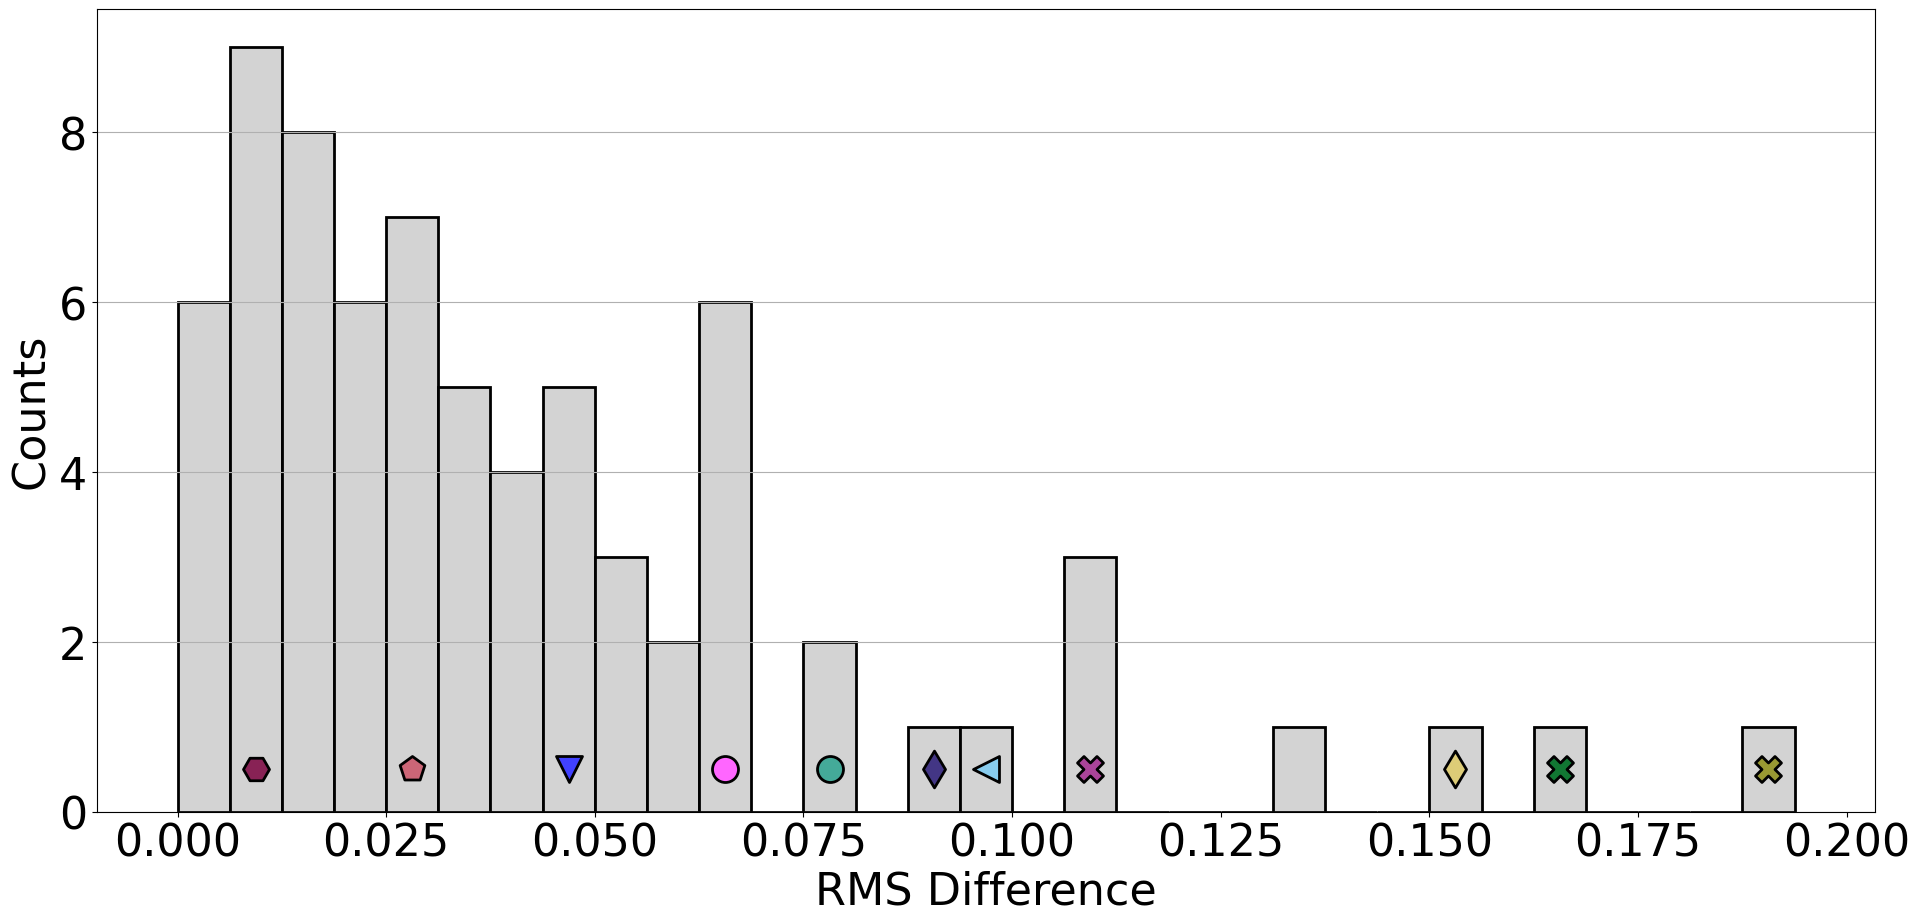

In [5]:

plt.rcParams.update({'font.size':32})
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(QC['RMSD'], bins=[i*0.00625 for i in range(32)], edgecolor='k', color='lightgrey', linewidth=2)
#ax.set_title('RMS Difference')
ax.set_xlabel('RMS Difference')
ax.set_ylabel('Counts')
ax.grid(axis='y')

for i in range(32):
    x = (i+0.5)*0.00625
    for idx, model in enumerate(highlight_list[i]):
        ax.scatter(x=x, y=idx+0.5, marker=model[0], c=model[1], s=highlight_marker_size, linewidths=2, edgecolor='k')

plt.tight_layout()

plt.savefig(f'./data/{models_dir}/figures/RMSDist.png')
plt.savefig(f'./data/{models_dir}/figures/RMSDist.pdf')
plt.show()
plt.rcParams.update({'font.size':20})

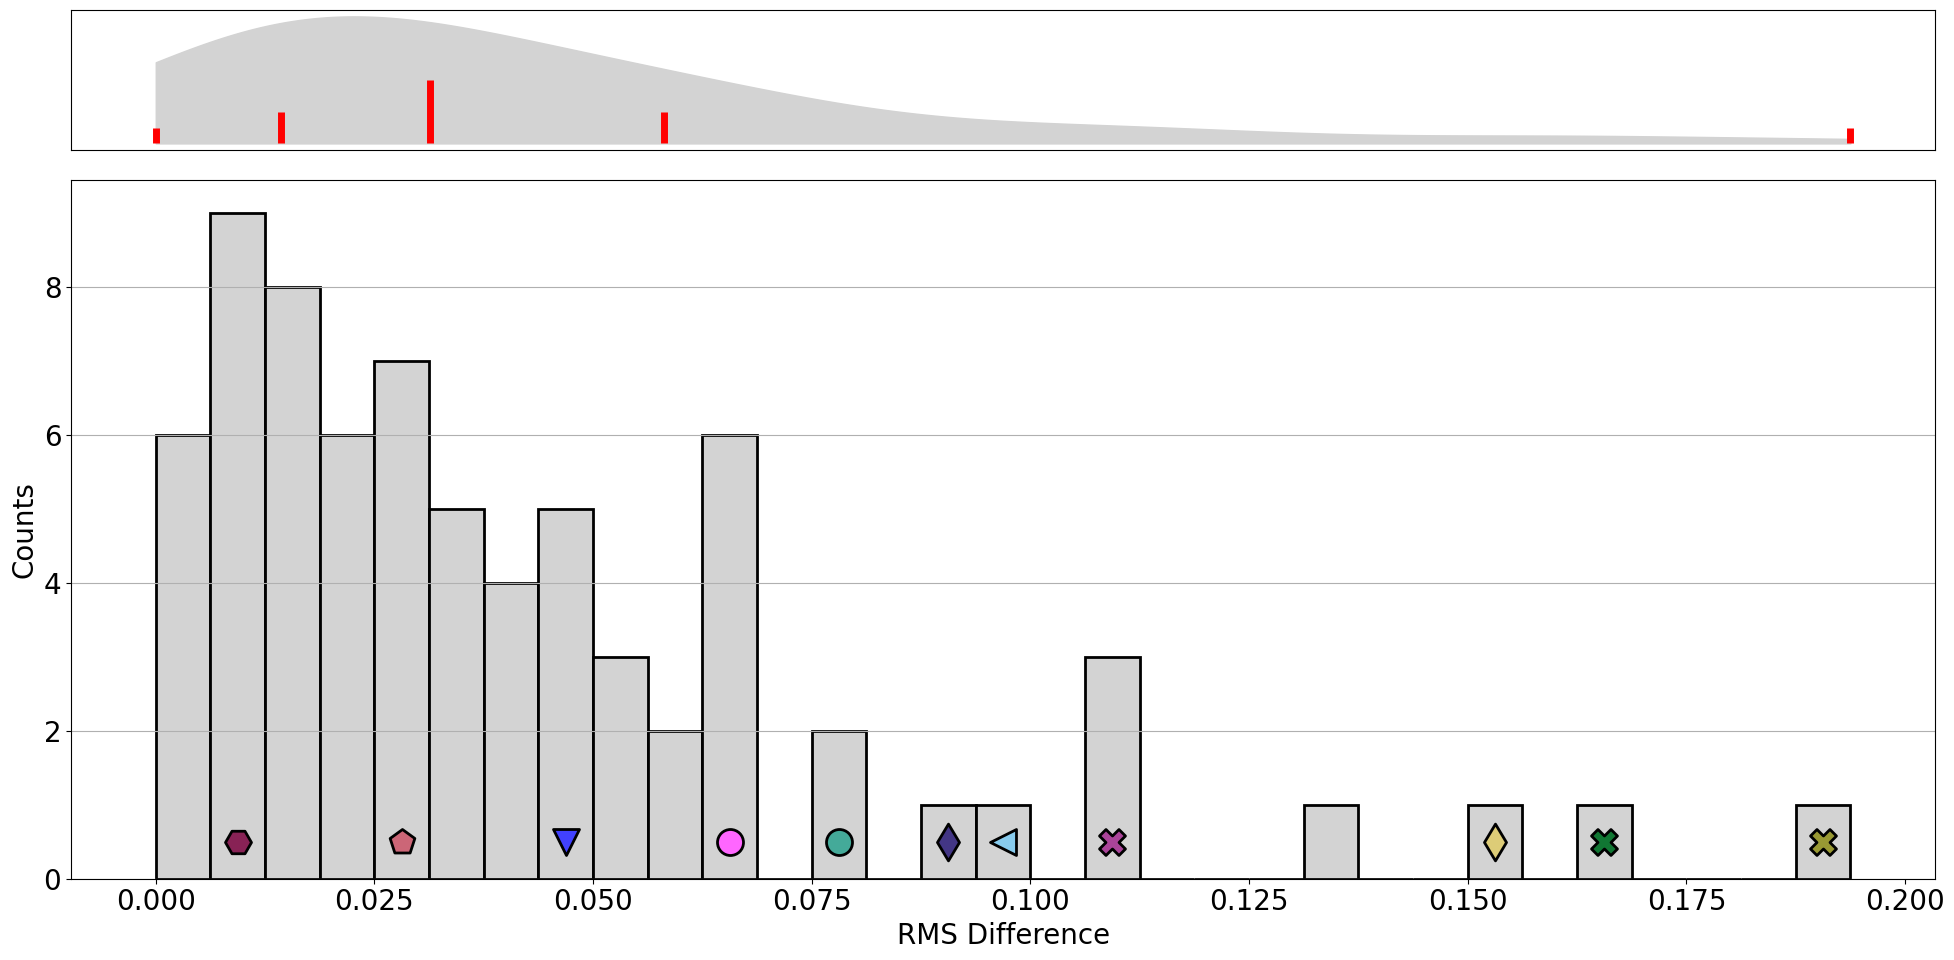

In [6]:
#fig = hist_kde_pair(np.sqrt(QC['dss/N']), stretch_factor=5, var_name='RMS Difference')
fig, ax = plt.subplot_mosaic([['KDE'], ['hist']], figsize=(20, 10), 
                                 gridspec_kw={'height_ratios':[1, 5]})

dx = gaussian_kde(QC['RMSD'])
lx = np.linspace(min(QC['RMSD']),max(QC['RMSD']),1000)
dlx = dx(lx)
ax['KDE'].fill_between(lx,dlx,color='lightgrey')
ax['KDE'].vlines(np.quantile(QC['RMSD'],[0.0,0.25,0.5,0.75,1.0]),0,np.array([0.25,0.5,1.0,0.5,0.25])*max(dlx)/2,linewidth=5,color='red')
ax['KDE'].get_yaxis().set_visible(False)
ax['KDE'].get_xaxis().set_visible(False)

ax['hist'].hist(QC['RMSD'], bins=[i*0.00625 for i in range(32)], edgecolor='k', color='lightgrey', linewidth=2)
#ax.set_title('RMS Difference')
ax['hist'].set_xlabel('RMS Difference')
ax['hist'].set_ylabel('Counts')
ax['hist'].grid(axis='y')

for i in range(32):
    x = (i+0.5)*0.00625
    for idx, model in enumerate(highlight_list[i]):
        ax['hist'].scatter(x=x, y=idx+0.5, marker=model[0], c=model[1], s=highlight_marker_size, linewidths=2, edgecolor='k')

plt.tight_layout()

plt.savefig(f'./data/{models_dir}/figures/RMSDist_Gauss.png')
plt.savefig(f'./data/{models_dir}/figures/RMSDist_Gauss.pdf')
plt.show()

In [7]:
highlight_list_source = [[] for _ in range(45)]
for model, color in highlight_color_dict.items():
    idx = int(QC['NS/N'][model]/0.0125)
    highlight_list_source[idx].append((category_symbol_dict[QC['category'][model]], color))

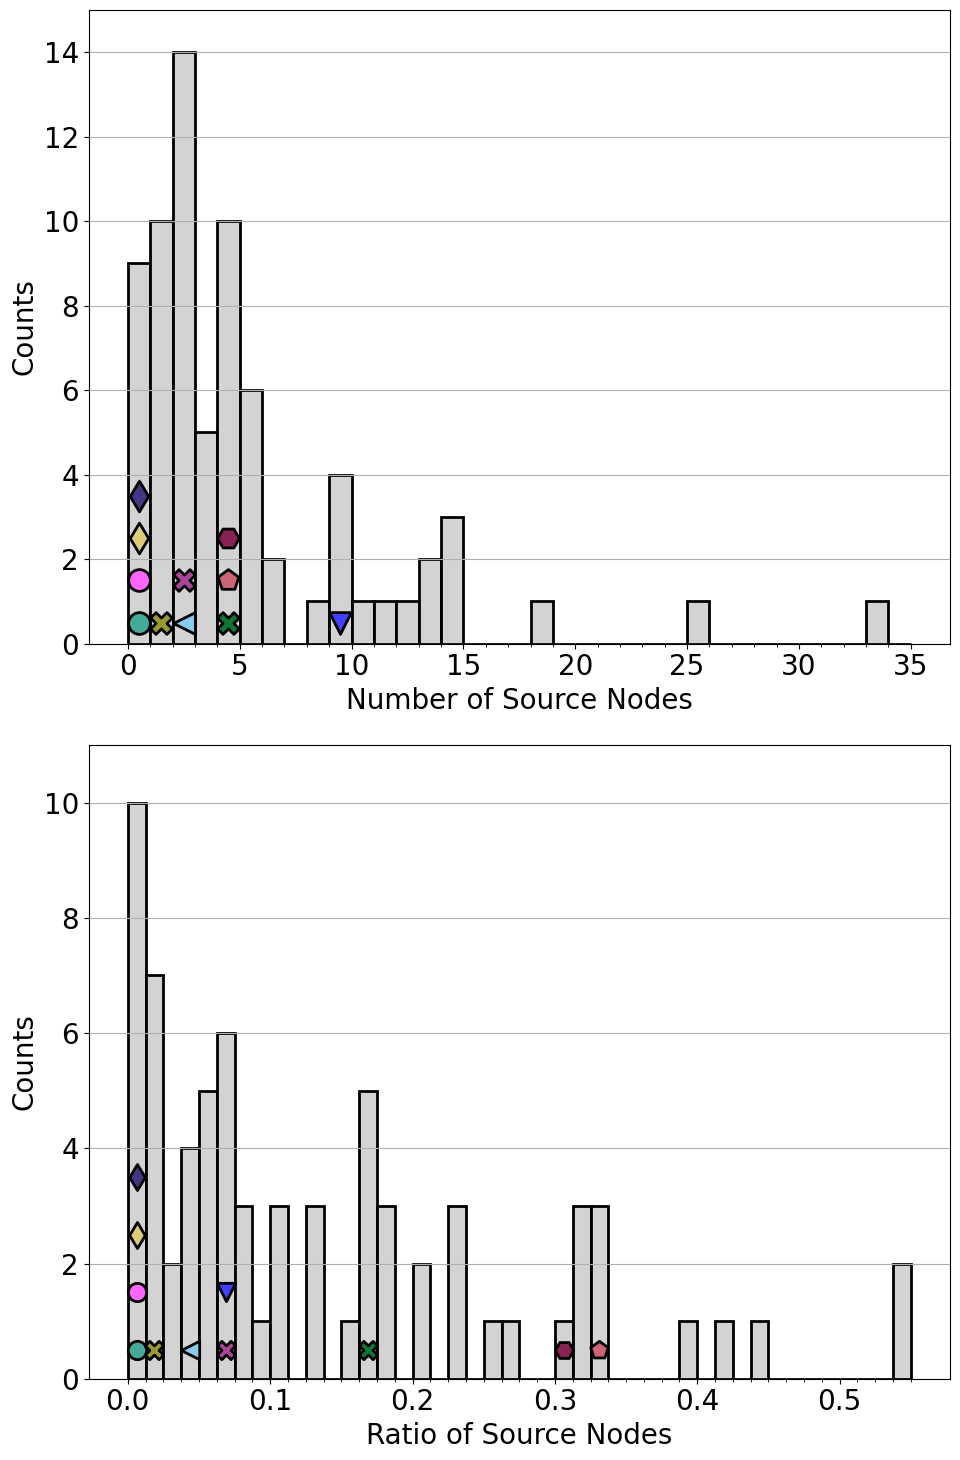

In [8]:

fig,ax = plt.subplots(2,1,figsize=(10,15))
ax[0].hist(QC['NS'], bins=35, range=(0,35), edgecolor='k', color='lightgrey', linewidth=2)
ax[0].set_xlabel('Number of Source Nodes')
ax[0].set_ylabel('Counts')
ax[0].set_yticks(range(0,15,2))
ax[0].set_xticks(range(0,35), minor=True)
ax[0].set_ylim((0, 15))
ax[0].grid(axis='y')

count = np.zeros(10) # Highlighted models have at most 10 source nodes
for model, color in highlight_color_dict.items():
    count[QC['NS'][model]] += 1
    ax[0].scatter(x=0.5+QC['NS'][model], y=count[QC['NS'][model]]-0.5, marker=category_symbol_dict[QC['category'][model]], c=color, s=0.7*highlight_marker_size, linewidths=2, edgecolor='k')


ax[1].hist(QC['NS/N'], bins=[i*0.0125 for i in range(45)], edgecolor='k', color='lightgrey', linewidth=2)
ax[1].set_xlabel('Ratio of Source Nodes')
ax[1].set_ylabel('Counts')
ax[1].set_yticks(range(0,11,2))
ax[1].set_xticks([i*0.0125 for i in range(45)], minor=True)
ax[1].set_ylim((0, 11))
ax[1].grid(axis='y')

for i in range(45):
    x = (i+0.5)*0.0125
    for idx, model in enumerate(highlight_list_source[i]):
        ax[1].scatter(x=x, y=idx+0.5, marker=model[0], c=model[1], s=0.5*highlight_marker_size, linewidths=2, edgecolor='k')

plt.tight_layout()
plt.savefig(f'./data/{models_dir}/figures/sources.png')
plt.savefig(f'./data/{models_dir}/figures/sources.pdf')
plt.show()

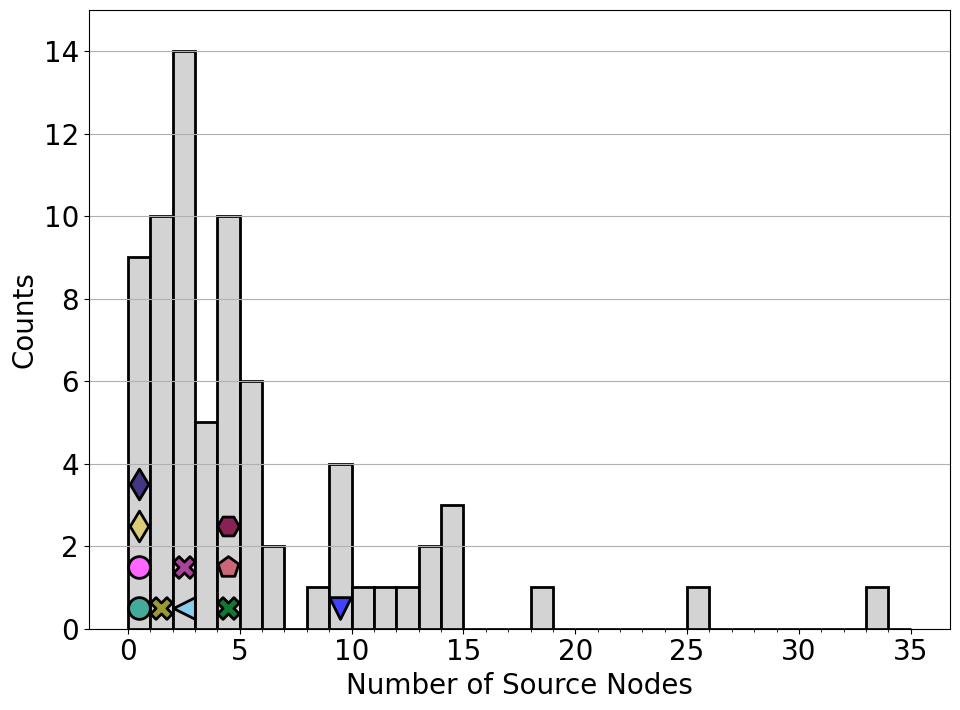

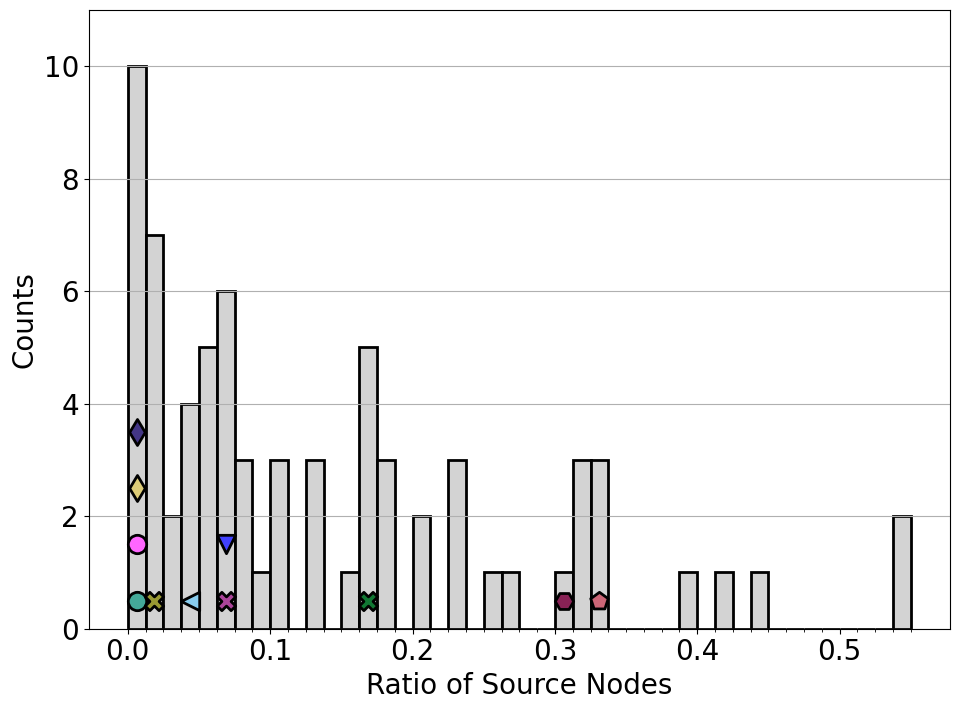

In [9]:
fig,ax = plt.subplots(1,1,figsize=(10,7.5), sharey=True)
ax.hist(QC['NS'], bins=35, range=(0,35), edgecolor='k', color='lightgrey', linewidth=2)
ax.set_xlabel('Number of Source Nodes')
ax.set_ylabel('Counts')
ax.set_yticks(range(0,15,2))
ax.set_xticks(range(0,35), minor=True)
ax.set_ylim((0, 15))
ax.grid(axis='y')

count = np.zeros(10) # Highlighted models have at most 10 source nodes
for model, color in highlight_color_dict.items():
    count[QC['NS'][model]] += 1
    ax.scatter(x=0.5+QC['NS'][model], y=count[QC['NS'][model]]-0.5, marker=category_symbol_dict[QC['category'][model]], c=color, s=0.7*highlight_marker_size, linewidths=2, edgecolor='k')

plt.tight_layout()
plt.savefig(f'./data/{models_dir}/figures/sources_number.png')
plt.savefig(f'./data/{models_dir}/figures/sources_number.pdf')
plt.show()

fig,ax = plt.subplots(1,1,figsize=(10,7.5))
ax.hist(QC['NS/N'], bins=[i*0.0125 for i in range(45)], edgecolor='k', color='lightgrey', linewidth=2)
ax.set_xlabel('Ratio of Source Nodes')
ax.set_ylabel('Counts')
ax.set_yticks(range(0,11,2))
ax.set_xticks([i*0.0125 for i in range(45)], minor=True)
ax.set_ylim((0, 11))
ax.grid(axis='y')

for i in range(45):
    x = (i+0.5)*0.0125
    for idx, model in enumerate(highlight_list_source[i]):
        ax.scatter(x=x, y=idx+0.5, marker=model[0], c=model[1], s=0.5*highlight_marker_size, linewidths=2, edgecolor='k')

plt.tight_layout()
plt.savefig(f'./data/{models_dir}/figures/sources_ratio.png')
plt.savefig(f'./data/{models_dir}/figures/sources_ratio.pdf')
plt.show()